### Vishal Sharma : 50298809

### Question 1:  Perform Exploratory data analysis.
○ What can you conclude from methods of central tendency and deviation of
the variables?
○ Are there any correlated variables?
○ Interpret the skewness of the variables

In [1]:
#  Load the data

import pandas as pd
cancer_data = pd.read_csv("C:/Users/Vishal Sharma/Documents/cancer.csv")
cancer_data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [2]:
# Summary Statistics

cancer_data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<IPython.core.display.Javascript object>


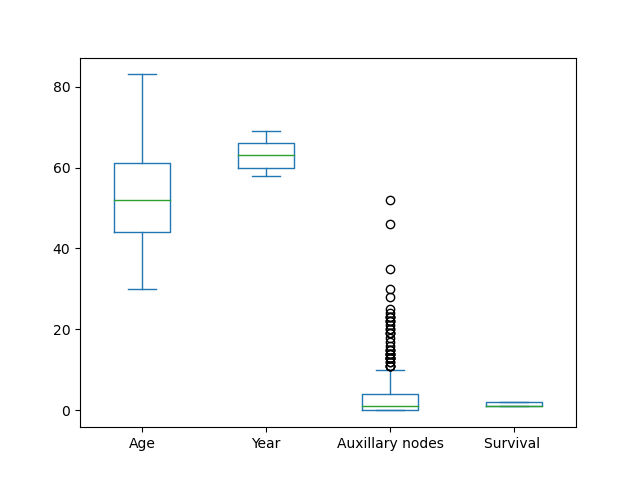

<AxesSubplot:>

In [50]:
# Box plot

%matplotlib notebook

cancer_data.plot.box()

#From below, there are outliers in the Aux nodes data 

<IPython.core.display.Javascript object>


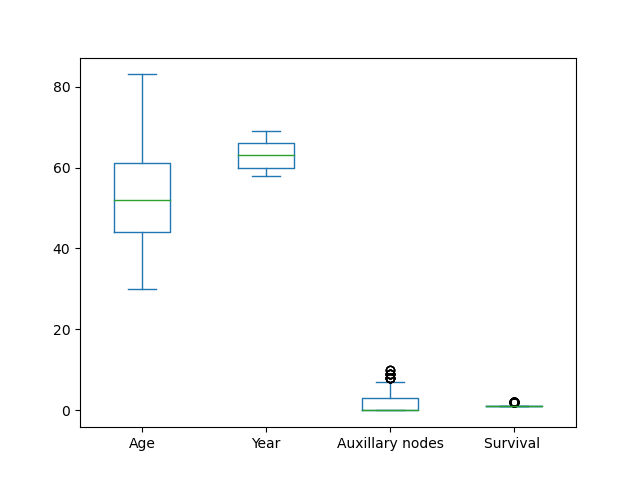

<AxesSubplot:>

In [51]:
# removing outliers

cancer_max = 4 + 1.5*(4 - 0)
new_cancer_data = cancer_data[cancer_data["Auxillary nodes"]<=cancer_max]

new_cancer_data.plot.box()

In [5]:
#correlation

corr = new_cancer_data.corr()
corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


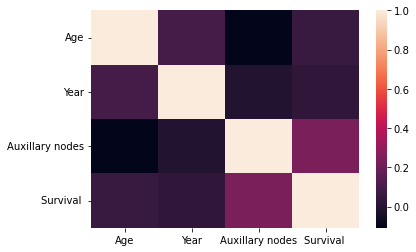

In [6]:
# Visualization - correlation

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr)

plt.show()

# from below no correlation is notice

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

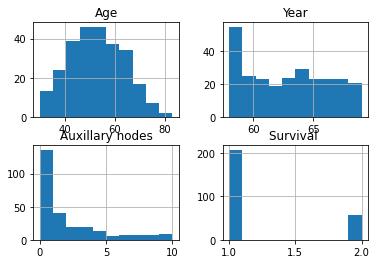

In [7]:
# Skewness

new_cancer_data.hist()

C:\Users\VISHAL~1\AppData\Local\Temp/ipykernel_6128/764790355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cancer_data["Auxillary nodes"] = new_cancer_data["Auxillary nodes"]**(0.5)
C:\Users\VISHAL~1\AppData\Local\Temp/ipykernel_6128/764790355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cancer_data["Year"] = new_cancer_data["Year"]**(0.5)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

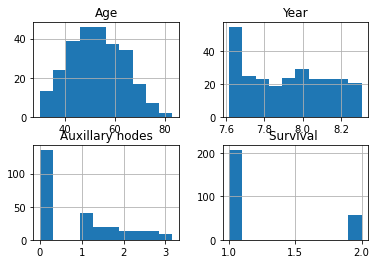

In [8]:
# Removing Skewness

new_cancer_data["Auxillary nodes"] = new_cancer_data["Auxillary nodes"]**(0.5)
new_cancer_data["Year"] = new_cancer_data["Year"]**(0.5)
new_cancer_data.hist()

In [9]:
# Standardization 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(new_cancer_data)
scaled = scaler.fit_transform(new_cancer_data)
scaled_data = pd.DataFrame(scaled, columns = new_cancer_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,-2.078151,-0.246077,0.887830,-0.529333
1,-2.078151,0.669605,-0.855899,-0.529333
2,-1.986534,-1.184194,0.567850,-0.529333
3,-1.986534,0.669605,1.157586,-0.529333
4,-1.803300,-1.502178,2.327700,-0.529333
...,...,...,...,...
260,2.044615,-0.246077,0.150843,-0.529333
261,2.136233,1.268362,-0.855899,-0.529333
262,2.227850,0.669605,0.887830,-0.529333
263,2.319467,0.669605,0.150843,1.889171


In [10]:
 # Normalization 
    
scaler = MinMaxScaler()
scaler.fit(new_cancer_data)
scaled = scaler.fit_transform(new_cancer_data)
scaled_data = pd.DataFrame(scaled, columns = new_cancer_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,0.000000,0.373792,0.547723,0.0
1,0.000000,0.646282,0.000000,0.0
2,0.018868,0.094626,0.447214,0.0
3,0.018868,0.646282,0.632456,0.0
4,0.056604,0.000000,1.000000,0.0
...,...,...,...,...
260,0.849057,0.373792,0.316228,0.0
261,0.867925,0.824461,0.000000,0.0
262,0.886792,0.646282,0.547723,0.0
263,0.905660,0.646282,0.316228,1.0


### Question 2: Develop Supervised learning models.

In [11]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [12]:
# Import data

cdata = cancer_data

# Create features/inputs
X = cdata.drop(columns = ["Survival "])

# Create the output/class
y = cdata["Survival "]


cdata

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [13]:
# Implement k-fold cross validation

# Specify the number of splits - 10
kf = KFold(n_splits=10)

for train_indices, test_indices in kf.split(cdata):

    x_train,x_test = X.iloc[train_indices],X.iloc[test_indices]
    y_train,y_test = y.iloc[train_indices],y.iloc[test_indices]

### a) Logistic Regression

In [14]:
# Defining and training the Logistic Regression model
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(x_train, y_train)

# Implement grid search for parameter tuning

parameters = {'solver':('liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'), 'C':[100,10,1.0,0.1,0.01]}

clf_grid = GridSearchCV(clf, parameters)
clf_grid.fit(x_train, y_train)
clf_grid.best_params_

{'C': 100, 'solver': 'liblinear'}

              precision    recall  f1-score   support

           1       0.76      0.96      0.85        23
           2       0.00      0.00      0.00         7

    accuracy                           0.73        30
   macro avg       0.38      0.48      0.42        30
weighted avg       0.58      0.73      0.65        30



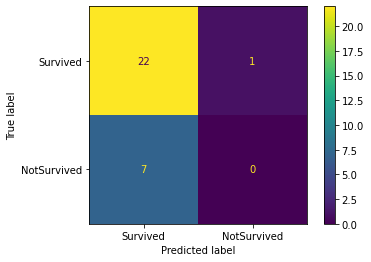

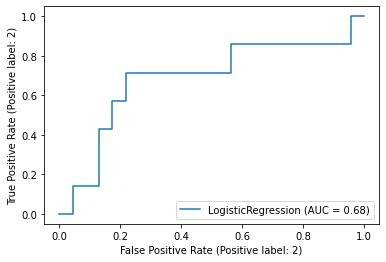

In [15]:

# Evaluating the model 
clf.score(x_test, y_test)

# Making predictions
y_pred = clf.predict(x_test)

# Creating the labels
labels = ["Survived", "NotSurvived"]

# Developing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, x_test, y_test) 
plt.show()

### b) random forest algorithm

In [16]:
# Defining and training the random forest model
rndft = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(x_train, y_train)

# Implement grid search for parameter tuning

rndft_parameters = {'max_features':('sqrt', 'log2'),'n_estimators':[10,100,1000], 'max_depth':[10]}

rndft_grid = GridSearchCV(rndft, rndft_parameters)
rndft_grid.fit(x_train, y_train)
rndft_grid.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}

              precision    recall  f1-score   support

           1       0.83      0.65      0.73        23
           2       0.33      0.57      0.42         7

    accuracy                           0.63        30
   macro avg       0.58      0.61      0.58        30
weighted avg       0.72      0.63      0.66        30



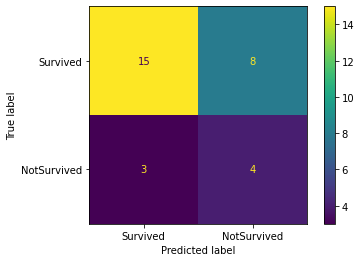

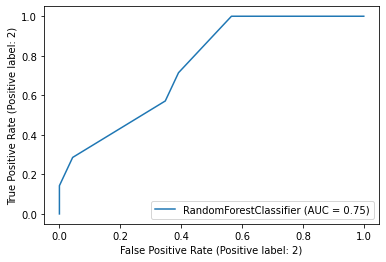

In [17]:
# Developing and fitting the random forest algorithm
rndft_alg = RandomForestClassifier(n_estimators = 10, max_depth = 10, max_features = 'log2', random_state = 0).fit(x_train, y_train)

# Making predictions
rf_pred = rndft_alg.predict(x_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = rndft_alg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = rndft_alg.classes_))

# Plotting ROC curve
plot_roc_curve(rndft_alg, x_test, y_test) 
plt.show()

### c) Support Vector Machine

In [18]:
# Defining and training the Support Vector Machine
svm = SVC(kernel='rbf', C=1.0,gamma='auto', degree =3).fit(x_train, y_train)

# Implement grid search for parameter tuning

svm_parameters = {'C': [100, 10, 1.0, 0.1, 0.001], 'gamma' : [100, 10, 1.0, 0.1]}

rndft_grid = GridSearchCV(svm, svm_parameters)
rndft_grid.fit(x_train, y_train)
rndft_grid.best_params_

{'C': 0.1, 'gamma': 100}

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        23
           2       0.00      0.00      0.00         7

    accuracy                           0.77        30
   macro avg       0.38      0.50      0.43        30
weighted avg       0.59      0.77      0.67        30



E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


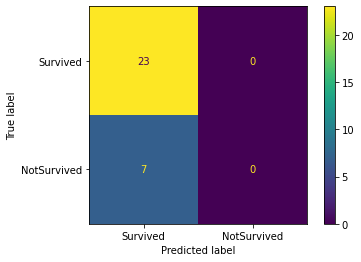

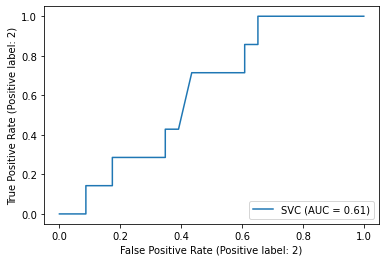

In [19]:
# Developing and fitting the Support Vector Machine
svm = SVC(kernel='rbf', C=0.1,gamma='auto', degree =3).fit(x_train, y_train)

svm_pred = svm.predict(x_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = svm.classes_))

# Plotting ROC curve
plot_roc_curve(svm, x_test, y_test) 
plt.show()

### d) Neural Network

In [37]:
# Defining and training the Neural Network
nn = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1).fit(x_train, y_train)

# Implement grid search for parameter tuning

nn_parameters = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

nn_grid = GridSearchCV(nn, nn_parameters, n_jobs=-1, cv=5)
nn_grid.fit(x_train, y_train)
nn_grid.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'solver': 'sgd'}

<IPython.core.display.Javascript object>


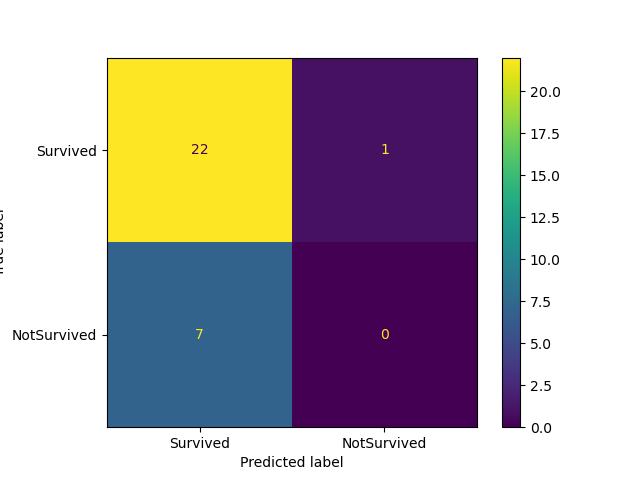

              precision    recall  f1-score   support

           1       0.76      0.96      0.85        23
           2       0.00      0.00      0.00         7

    accuracy                           0.73        30
   macro avg       0.38      0.48      0.42        30
weighted avg       0.58      0.73      0.65        30



<IPython.core.display.Javascript object>


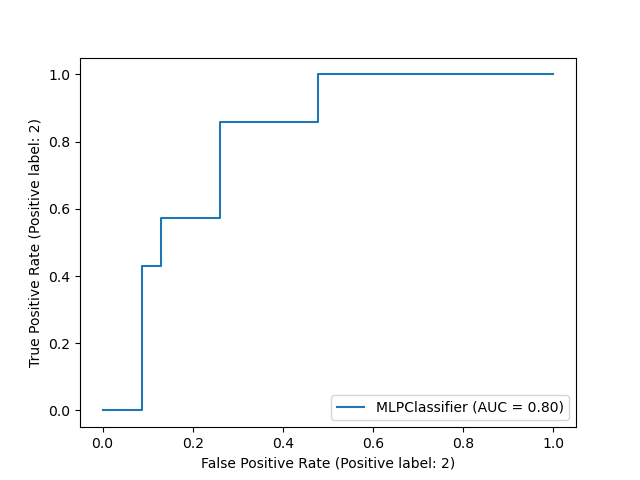

In [73]:
# Developing and fitting the Neural Network

nn = MLPClassifier(hidden_layer_sizes=(20,),activation='relu',alpha=0.0001,solver='sgd',learning_rate='constant').fit(x_train, y_train)

nn_pred = nn.predict(x_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = nn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = nn.classes_))

# Plotting ROC curve
plot_roc_curve(nn, x_test, y_test) 
plt.show()

### Question 3: Evaluate if the algorithms are overfitting?

In [70]:
# Implement k-fold cross validation

# Specify the number of splits - 10

#LogisticRegression

kf = KFold(n_splits=10)

iteration = 1
lst = []
for train_indices, test_indices in kf.split(x_train):
    clf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    lst.append((clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1
    
lst
avg_lst = sum(lst)/len(lst)
print("\nAverage of f1-score on Test set is :" + str(avg_lst))



Accuracy for iteration 1 is 0.8928571428571429
Accuracy for iteration 2 is 0.8214285714285714
Accuracy for iteration 3 is 0.6785714285714286
Accuracy for iteration 4 is 0.7142857142857143
Accuracy for iteration 5 is 0.7857142857142857
Accuracy for iteration 6 is 0.6296296296296297
Accuracy for iteration 7 is 0.6666666666666666
Accuracy for iteration 8 is 0.8888888888888888
Accuracy for iteration 9 is 0.7037037037037037
Accuracy for iteration 10 is 0.7407407407407407

Average of f1-score on Test set is :0.7522486772486774


# LogisticRegression

From the Logistic Regression algorithm, the f1-score is 0.85 and the average calculated value is 0.75, hence, the model is not overfitting.

# RandomForest

From the Random Forest algorithm, the f1-score is 0.73. Hence, the model is not overfitting.

# SupportVectorMachine

From the Support Vector Machine algorithm, the f1-score is 0.87. Hence, the model is not overfitting.

# NeuralNetwork

From the Support Vector Machine algorithm, the f1-score is 0.85. Hence, the model is not overfitting.

### Question 4: Develop a function which can implement machine learning.

In [53]:
# Defining the function

def machine_learning (data, algorithm):
    if algorithm == 'LogisticRegression':
        # Defining and training the Logistic Regression model
        clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(x_train, y_train)

        # Implement grid search for parameter tuning

        # parameters = {'solver':('linear', 'rbf', 'poly'), 'C':[100,10,1.0,0.1,0.01]}

        parameters = {'solver':('liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'), 'C':[100,10,1.0,0.1,0.01]}

        clf_grid = GridSearchCV(clf, parameters)
        clf_grid.fit(x_train, y_train)
        clf_grid.best_params_
        
        
        # Evaluating the model 
        clf.score(x_test, y_test)

        # Making predictions
        y_pred = clf.predict(x_test)

        # Creating the labels
        labels = ["Survived", "NotSurvived"]

        # Developing the confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

        # Display Confusion Matrix
        disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
        disp.plot()

        # Print performance metrics 
        print(classification_report(y_test, y_pred, labels = clf.classes_))

        # Plotting ROC curve
        plot_roc_curve(clf, x_test, y_test) 
        plt.show()
        
    elif algorithm == 'RandomForest':
        # Creating the labels
        labels = ["Survived", "NotSurvived"]
        
        # Defining and training the random forest model
        rndft = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False).fit(x_train, y_train)

        # Implement grid search for parameter tuning

        rndft_parameters = {'max_features':('sqrt', 'log2'),'n_estimators':[10,100,1000], 'max_depth':[10]}

        rndft_grid = GridSearchCV(rndft, rndft_parameters)
        rndft_grid.fit(x_train, y_train)
        rndft_grid.best_params_
        
        # Developing and fitting the random forest algorithm
        rndft_alg = RandomForestClassifier(n_estimators = 10, max_depth = 10, max_features = 'log2', random_state = 0).fit(x_train, y_train)

        # Making predictions
        rf_pred = rndft_alg.predict(x_test)

        cm_rf = confusion_matrix(y_test, rf_pred, labels = rndft_alg.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
        disp.plot()
        print(classification_report(y_test, rf_pred, labels = rndft_alg.classes_))

        # Plotting ROC curve
        plot_roc_curve(rndft_alg, x_test, y_test) 
        plt.show()
        
    elif algorithm == 'SupportVectorMachine':
        # Creating the labels
        labels = ["Survived", "NotSurvived"]
        
        # Defining and training the Support Vector Machine
        svm = SVC(kernel='rbf', C=1.0,gamma='auto', degree =3).fit(x_train, y_train)

        # Implement grid search for parameter tuning

        svm_parameters = {'C': [100, 10, 1.0, 0.1, 0.001], 'gamma' : [100, 10, 1.0, 0.1]}

        rndft_grid = GridSearchCV(svm, svm_parameters)
        rndft_grid.fit(x_train, y_train)
        rndft_grid.best_params_
        
        # Developing and fitting the Support Vector Machine
        svm = SVC(kernel='rbf', C=0.1,gamma='auto', degree =3).fit(x_train, y_train)

        svm_pred = svm.predict(x_test)

        cm_svm = confusion_matrix(y_test, svm_pred, labels = svm.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
        disp.plot()
        print(classification_report(y_test, svm_pred, labels = svm.classes_))

        # Plotting ROC curve
        plot_roc_curve(svm, x_test, y_test) 
        plt.show()
        
    elif algorithm == 'NeuralNetwork':
        # Creating the labels
        labels = ["Survived", "NotSurvived"]
        
        # Defining and training the Neural Network
        nn = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1).fit(x_train, y_train)

        # Implement grid search for parameter tuning

        nn_parameters = {
            'hidden_layer_sizes': [(10,30,10),(20,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
        }

        nn_grid = GridSearchCV(nn, nn_parameters, n_jobs=-1, cv=5)
        nn_grid.fit(x_train, y_train)
        nn_grid.best_params_
        
        # Developing and fitting the Neural Network

        nn = MLPClassifier(hidden_layer_sizes=(20,),activation='relu',alpha=0.0001,solver='sgd',learning_rate='constant').fit(x_train, y_train)

        nn_pred = nn.predict(x_test)

        cm_nn = confusion_matrix(y_test, nn_pred, labels = nn.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
        disp.plot()
        print(classification_report(y_test, nn_pred, labels = nn.classes_))

        # Plotting ROC curve
        plot_roc_curve(nn, x_test, y_test) 
        plt.show()
        

<IPython.core.display.Javascript object>


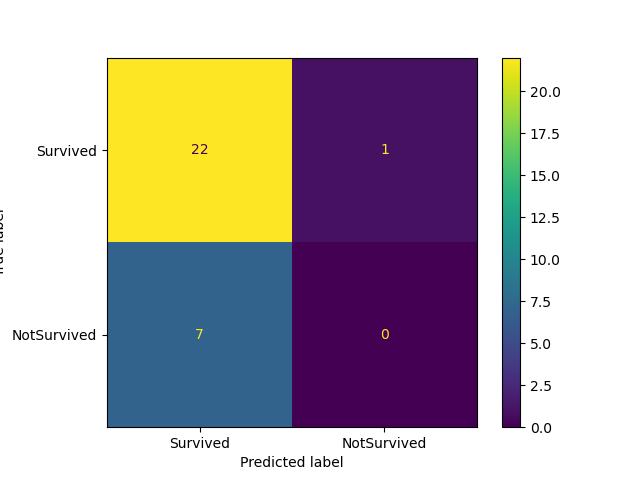

              precision    recall  f1-score   support

           1       0.76      0.96      0.85        23
           2       0.00      0.00      0.00         7

    accuracy                           0.73        30
   macro avg       0.38      0.48      0.42        30
weighted avg       0.58      0.73      0.65        30



<IPython.core.display.Javascript object>


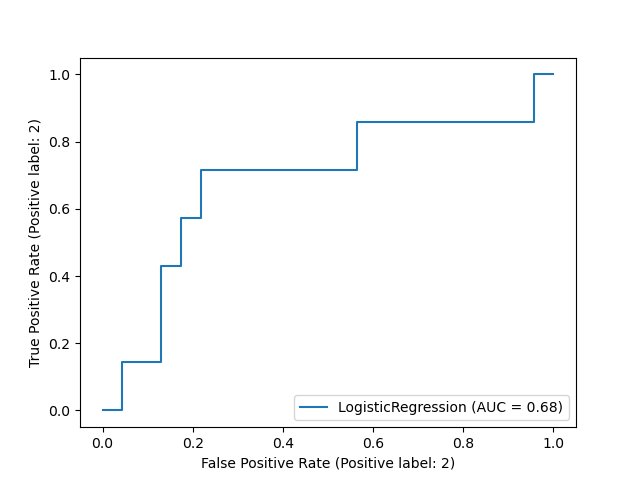

In [56]:
# Calling the fumction: By chaning the Names we will get the following output:
#Names are given below:
#LogisticRegression
#RandomForest
#SupportVectorMachine
#NeuralNetwork

machine_learning (cdata, 'LogisticRegression')